In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.std_dev = None
        self.components = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std_dev = np.std(X, axis=0)
        print("Mean of each feature:\n", self.mean)
        print("Standard deviation of each feature:\n", self.std_dev)

        X = (X - self.mean) / self.std_dev
        print("Standardized data:\n", X)

        cov = np.dot(X.T, X) / (X.shape[0] - 1)
        print("Covariance matrix:\n", cov)


        eigenvalues, eigenvectors = np.linalg.eig(cov)
        print("Eigenvalues:\n", eigenvalues)
        print("Eigenvectors:\n", eigenvectors)


        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]
        print("Sorted Eigenvalues:\n", eigenvalues)
        print("Sorted Eigenvectors:\n", eigenvectors)

 
        self.components = eigenvectors[:, :self.n_components]
        print(f"Selected {self.n_components} principal components:\n", self.components)

    def transform(self, X):
      
        X = (X - self.mean) / self.std_dev
        print("Standardized data for transformation:\n", X)

        transformed_data = np.dot(X, self.components)
        print("Transformed data:\n", transformed_data)
        return transformed_data


In [3]:
import numpy as np
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data  


pca = PCA(n_components=2)

pca.fit(X)

X_transformed = pca.transform(X)




Mean of each feature:
 [5.84333333 3.05733333 3.758      1.19933333]
Standard deviation of each feature:
 [0.82530129 0.43441097 1.75940407 0.75969263]
Standardized data:
 [[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.319

In [5]:
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)

Original shape: (150, 4)
Transformed shape: (150, 2)


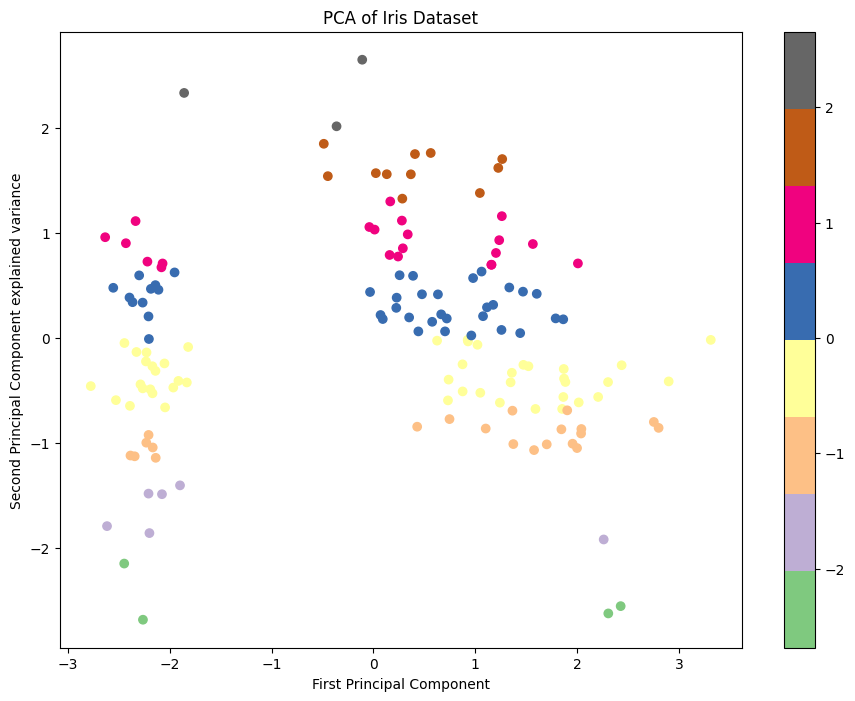

In [13]:
X= X_transformed[:, 0]
y= X_transformed[:, 1]

plt.figure(figsize=(11, 8))
scatter = plt.scatter(X, y, c=y, cmap='Accent')
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component explained variance')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter)
plt.show()